<a href="https://colab.research.google.com/github/maximalsteel/Hackathons-Machine-Learning/blob/main/workation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Workation/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Workation/Test.csv')

In [ ]:
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [ ]:
test.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules
0,12c47aefbcca65d6156ba0bc7946704b,Goa 5N stay with flights & Transfers-North Goa,Luxury,Goa,5N Goa,Goa,13-07-2021,Novotel Goa Resort & Spa:4.1,New Delhi,IndiGo,0,4,Not Available,Cancellation any time after making the 1st pay...
1,156febf7d27315ae9f210ed13bca3ac2,Into the Wild - Weekend at Bandipur National Park,Luxury,Bandipur,2N Bandipur,Bandipur,20-03-2021,The Windflower Jungle Resorts & Spa Bandipur:4.4,New Delhi,Not Available,0,4,Bandipur National Park,This cancellation policy is applicable for boo...
2,a7f43314e3ee6464a4e35b874bddf2ea,Unforgettable Munnar Getaway - Private Picnic ...,Standard,Munnar,3N Munnar,Munnar,09-02-2022,Not Available,New Delhi,Not Available,2,3,Old Munnar Town | Eravikulam national park | ...,This cancellation policy is applicable for boo...
3,d9cc4b407f3d5d290560c03d9ac71035,Munnar for Adventure Lovers - Top Valley Trek,Deluxe,Munnar,3N Munnar,Munnar,16-05-2021,Not Available,Mumbai,Not Available,1,3,Tata Tea Museum | Eravikulam national park | ...,This cancellation policy is applicable for boo...
4,b3bbc8aa6429feb260e9ac0a91f252c4,Splendours of Kerala - Make your own Tea,Luxury,Cochin|Munnar|Thekkady|Allepey,1N Cochin . 2N Munnar . 1N Thekkady . 1N Allepey,Cochin|Munnar|Thekkady|Allepey,13-10-2021,Casino Hotel - Cgh Earth-MMT Holidays Special:...,New Delhi,IndiGo,0,4,Fort Cochin | Dutch Palace | Jewish Synagogue...,Cancellation any time after making the 1st pay...


In [ ]:
# Places Covered
len(train['Places Covered'][0].split('|'))

# lambda x:len(x.split("|"))

#Lets combine the train and test
combined = pd.concat([train,test],ignore_index = True)
combined['count_places'] = combined['Places Covered'].apply(lambda x: len(x.split("|")))


In [ ]:
# Airline
combined['count_airline'] = combined['Airline'].apply(lambda x: len(x.split("|")))

In [ ]:
combined['count_ss'] = combined['Sightseeing Places Covered'].apply(lambda x: len(x.split("|")))

In [ ]:
combined.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,count_places,count_airline,count_ss
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,4,1,1
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5,3,2,7
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5,2,1,8
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0,4,1,9
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0,2,2,2


In [ ]:
combined['Package Name'].value_counts()[0:10].index

Index(['Bali Special 4 Nights',
       'Holiday in Manali & Chandigarh from Chandigarh',
       'Getaway to the Hills of Kodaikanal from Madurai',
       'Serene Uttarakhand with Kausani', 'Amazing Kerala',
       'MMT Value Deal - Bali (6N)', '4 Nights in Mysore, Wayanad & Kabini',
       'Delhi-Agra-Jaipur-Udaipur Holiday', 'Best of Kerala',
       'Mystical Himachal from Delhi'],
      dtype='object', name='Package Name')

In [ ]:
combined.loc[combined['Package Name'] == '2 Nights Dubai and 2 Nights Sharjah Holiday','Package Name'].value_counts()

,count
Package Name,
2 Nights Dubai and 2 Nights Sharjah Holiday,16


In [ ]:
top = ['Bali Special 4 Nights',
       'Holiday in Manali & Chandigarh from Chandigarh',
       'Getaway to the Hills of Kodaikanal from Madurai',
       'Serene Uttarakhand with Kausani', 'Amazing Kerala',
       'MMT Value Deal - Bali (6N)', '4 Nights in Mysore, Wayanad & Kabini',
       'Delhi-Agra-Jaipur-Udaipur Holiday', 'Best of Kerala',
       'Mystical Himachal from Delhi']

def top10(x):
  if x in top:
    return('Top_10')
  else:
    return('others')

combined['Package_Cat'] = combined['Package Name'].apply(top10)

In [ ]:
combined['Package Type'].value_counts()

,count
Package Type,
Deluxe,8499
Standard,8171
Premium,7960
Luxury,4688
Budget,682


In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Uniq Id                     30000 non-null  object 
 1   Package Name                30000 non-null  object 
 2   Package Type                30000 non-null  object 
 3   Destination                 30000 non-null  object 
 4   Itinerary                   30000 non-null  object 
 5   Places Covered              30000 non-null  object 
 6   Travel Date                 30000 non-null  object 
 7   Hotel Details               30000 non-null  object 
 8   Start City                  30000 non-null  object 
 9   Airline                     30000 non-null  object 
 10  Flight Stops                30000 non-null  int64  
 11  Meals                       30000 non-null  int64  
 12  Sightseeing Places Covered  30000 non-null  object 
 13  Cancellation Rules          300

In [ ]:
# Travel Date
combined['Travel Date'] = pd.to_datetime(combined['Travel Date'])

In [ ]:
combined['Date'] = combined['Travel Date'].dt.day
combined['Month'] = combined['Travel Date'].dt.month
combined['Year'] = combined['Travel Date'].dt.year

In [ ]:
combined.Year.unique()

array([2021, 2022], dtype=int32)

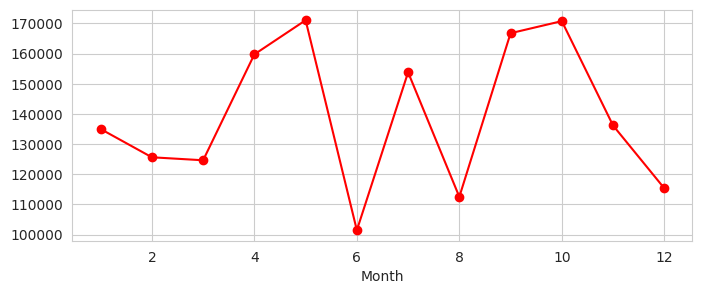

In [ ]:
# Month where people paid more...
sns.set_style('whitegrid')
plt.figure(figsize = (8,3))
combined.groupby('Month')['Per Person Price'].max().plot(kind='line',marker='o', color='red')
plt.show() # Busy months: 4,5,7,9,10


In [ ]:
busy = [4,5,7,9,10]

def month(x):
  if x in busy:
    return('Busy_month')
  else:
    return('Lean_Month')

combined['Month_Cat'] = combined['Month'].apply(month)

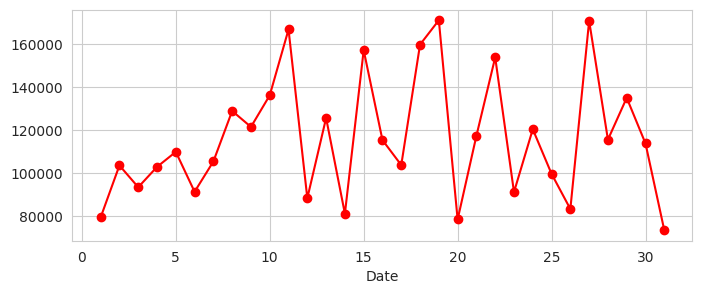

In [ ]:
# Days where people paid more...
sns.set_style('whitegrid')
plt.figure(figsize = (8,3))
combined.groupby('Date')['Per Person Price'].max().plot(kind='line',marker='o', color='red')
plt.show() # Busy days: 2,4,5,7,8,10,11,13,15,16,17,18,19,21,22,24,27,29


In [ ]:
days = [2,4,5,7,8,10,11,13,15,16,17,18,19,21,22,24,27,29]

# Assuming 'combined' is a dictionary with a key 'Days' containing a list of days
combined['Date_Cat'] = ['Busy_day' if day in days else 'Lean_Day' for day in combined['Date']]

In [ ]:
combined.Itinerary[2].split(".")[0].split('N')[0]

'2'

In [ ]:
import re

list_ = []

for i in combined['Itinerary']:
    # Extract all numeric values from the string
    numbers = re.findall(r'\d+', i)
    # Convert the extracted values to integers
    numeric_values = [int(num) for num in numbers]
    # Sum the numeric values
    total_duration = sum(numeric_values)
    # Append the total duration to the list
    list_.append(total_duration)

# Assign the list of durations to a new column 'Duration' in the DataFrame
combined['Duration'] = pd.Series(list_)

In [ ]:
# Bin the duration <5 : Week_Stay| 5 to 10: Two_Week_Stay and > 10: Fortnight_Stay

def stays(x):
  if x<5:
    return('Week_Stay')
  elif x>=5 and x<=7:
    return('Two_Week_Stay')
  else:
    return('Fortnight_Stay')

combined['Stay_Cat'] = combined['Duration'].apply(stays)

<Axes: xlabel='Stay_Cat', ylabel='Per Person Price'>

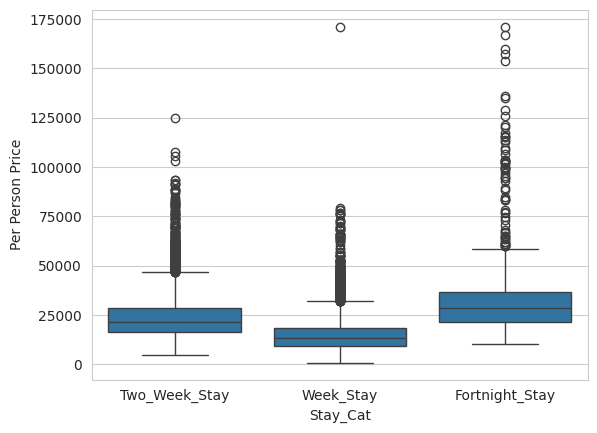

In [ ]:
sns.boxplot(x='Stay_Cat',y='Per Person Price',data=combined)

In [ ]:
# Hotel Details \d.\d+

pd.to_numeric(re.findall("\d.\d+",combined['Hotel Details'][3])).mean()

4.5

In [ ]:
pd.to_numeric(re.findall("\d.\d+",combined['Hotel Details'][3])).mean()

list_ = []

for i in combined['Hotel Details']:

    list_.append(pd.to_numeric(re.findall("\d.\d+",i),errors = 'coerce').mean())

combined['Rating'] = pd.Series(list_)

In [ ]:
combined.Rating.isnull().sum()

8543

In [ ]:
combined['Hotel Details'].unique()

array(['Not Available',
       'The Orchard Retreat & Spa:4.6|WelcomHotel Pine N Peak Pahalgam - Member ITC Hotel Group:4.1|The Orchard Retreat & Spa:4.6',
       'The Ananta:4.4|juSTa Lake Nahargarh Palace:4', ...,
       'Marari Beach - CGH Earth:4.6|Niraamaya Retreats Surya Samudra:4.5',
       'The Oberoi Cecil:Five|Fernhill Resort:Three',
       'Poppys Hotel:4.1|Hyatt Place Rameswaram:4.4|Hotel Temple Citi:4.2|Over The Hill-MMT Holidays Special:|Uday Backwater Resort-MMT Holidays Special:|Tea Village-MMT Holidays Special:'],
      dtype=object)

In [ ]:
text = 'Niraamaya Retreats Surya Samudra:4.5,The Oberoi Cecil:Five|Fernhill Resort:Three'
rating = re.findall(r':(\d+(?:\.\d+)?|[a-zA-Z]+)', text)
print(rating)

['4.5', 'Five', 'Three']


In [ ]:
def text_num(text):
  text_num_dict = {'Five':5,'Four':4,'Three':3,'Two':2,'One':1,'Zero':0}
  return text_num_dict.get(text,None)

numeric_rating = []
for rate in rating:
  if rate.isdigit() or '.' in rate:
    numeric_rating.append(float(rate))
  else:
    numeric_rating.append(text_num(rate))

print(numeric_rating)
print(np.mean(numeric_rating))

[4.5, 5, 3]
4.166666666666667


In [ ]:
# Function to calculate the rating....
def rating(text):
  rating = re.findall(r':(\d+(?:\.\d+)?|[a-zA-Z]+)', text)
  text_num_dict = {'Five':5,'Four':4,'Three':3,'Two':2,'One':1,'Zero':0}

  numeric_rating = []
  for rate in rating:
    if rate.isdigit() or '.' in rate:
      numeric_rating.append(float(rate))
    else:
      Value = text_num_dict.get(rate,None)
      if Value is not None:
        numeric_rating.append(Value)

    if numeric_rating:
      return (np.round(np.mean(numeric_rating),2))
    else:
      return np.NaN
# Unsupported operand type(s) for +: 'int' and 'NoneType'

In [ ]:
combined['Rating'] = combined['Hotel Details'].apply(rating)

In [ ]:
combined['Rating'].describe()

,Rating
count,24408.000000
mean,4.089962
std,0.477002
min,1.500000
25%,3.900000
50%,4.100000
75%,4.400000
max,5.000000


In [ ]:
combined.loc[combined.Rating.isnull(), 'Rating'] = 3.9

In [ ]:
new_df = combined.drop(['Uniq Id','Destination','Itinerary','Places Covered','Travel Date', 'Hotel Details','Airline', 'Sightseeing Places Covered','Cancellation Rules'],axis=1)

In [ ]:
new_df.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [ ]:
mapped = {'Budget':1,'Deluxe':5,'Luxury':2,'Premium':4,'Standard':3}
new_df['Package Type'] = new_df['Package Type'].map(mapped)

In [ ]:
# Count of Flights from Delhi Mumbai
# Count of Packages Booked from Location
# Count of People travelling from Delhi Mumbai
# Average Duration Basis Package/Package Name
# Count of Packages Booked basis package name

new_df['Magic1'] = combined.groupby('Start City')['count_airline'].transform('count')

In [ ]:
new_df.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
1,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
2,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
3,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0
4,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
5,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5


In [ ]:
# Duration Basis Package Type
new_df['Magic2'] = new_df.groupby('Package Type')['Duration'].transform('mean')
new_df['Magic3'] = new_df.groupby('Package Type')['Duration'].transform('median')
new_df['Magic4'] = new_df.groupby('Package Type')['Duration'].transform('max')

In [ ]:
# Count of Package sold every month
new_df['Magic5'] = new_df.groupby('Month')['Package Type'].transform('count')
new_df['Magic6'] = new_df.groupby('Date')['Package Type'].transform('count')

In [ ]:
new_df['Magic7'] = new_df.groupby('Year')['Package Type'].transform('count')

In [ ]:
new_df.head()

,Package Name,Package Type,Start City,Flight Stops,Meals,Per Person Price,count_places,count_airline,count_ss,Package_Cat,Date,Month,Year,Month_Cat,Date_Cat,Duration,Stay_Cat,Rating,Magic1,Magic2,Magic3,Magic4,Magic5,Magic6
0,Best of Shimla and Manali Holiday from Delhi,3,Mumbai,2,3,11509.0,4,1,1,others,30,7,2021,Busy_month,Lean_Day,6,Two_Week_Stay,3.9,10336,4.759148,5.0,14,2998,910
1,Kashmir Valley vacation,4,New Delhi,0,5,22485.5,3,2,7,others,8,12,2021,Lean_Month,Busy_day,4,Week_Stay,4.6,19664,4.765829,5.0,14,1709,980
2,Might of Mewar- Udaipur and Chittorgarh,2,New Delhi,0,4,12421.5,2,1,8,others,26,4,2021,Busy_month,Lean_Day,3,Week_Stay,4.4,19664,4.663183,5.0,12,2818,1003
3,Colorful Kerala ( Romantic Getaway ),4,New Delhi,0,5,35967.0,4,1,9,others,27,8,2021,Lean_Month,Busy_day,6,Two_Week_Stay,4.6,19664,4.765829,5.0,14,2875,996
4,A Week In Bangkok & Pattaya,4,New Delhi,0,5,25584.0,2,2,2,others,12,12,2021,Lean_Month,Lean_Day,7,Two_Week_Stay,4.5,19664,4.765829,5.0,14,1709,967


In [ ]:
final = new_df.drop(['Package Name','Start City','Date','Month','Year'],axis=1)

In [ ]:
# Splitting the data into train and test
newtrain = final.loc[0:train.shape[0]-1,:]
newtest = final.loc[train.shape[0]:, :]

newtest.drop('Per Person Price',axis=1,inplace=True)
train.shape, test.shape, newtrain.shape, newtest.shape

((21000, 15), (9000, 14), (21000, 20), (9000, 19))

In [ ]:
# Apply Encoding

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

X= dummytrain.drop('Per Person Price',axis=1)
y = dummytrain['Per Person Price']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

pred = gbm.fit(X,y).predict(dummytest)

In [ ]:
submission = pd.DataFrame({'Per Person Price':pred})
submission.to_csv('submission.csv',index=False)